╔══<i><b>Alai-DeepLearning</b></i>════════════════════════════╗
###  &nbsp;&nbsp; **✎&nbsp;&nbsp;Week 10. CNN Architectures**
# Section 4. Data Augmentation

### _Objective_

1. 현재 CIFAR 데이터셋은 클래스 당 500장에 불과하기 때문에, 데이터가 매우 적은 상황입니다.<br>
2. 데이터가 적으면, Overfitting 문제가 쉽게 발생합니다. 이 문제를 해결하기 위해서, 데이터의 수 자체를 늘려주는 Data Augmentation 방법이 존재합니다.<br>
  
╚═════════════════════════════════════════╝

In [0]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt
import tensorflow as tf

### 예제 데이터셋) CIFAR-100

In [0]:
from tensorflow.keras.datasets.cifar100 import load_data
(train_x, train_y), (test_x, test_y) = load_data()

In [0]:
class Dataset:
    # 데이터셋을 배치 단위로 처리할 수 있도록 도와주는 Class
    def __init__(self, images, labels):
        # fix me #        
    def __len__(self):
        # fix me#
    def __getitem__(self, idx):
        # fix me # : 특정 index 을 반환합니다. 
    def next_batch(self, batch_size=32):
        # fix me #
    def shuffle(self):
        # fix me #

In [0]:
# 이미지 시각화하기
train_set = Dataset(train_x,train_y)
num_sample = 5

sample_x, sample_y = train_set.next_batch(num_sample)

fig = plt.figure(figsize=(10,3))
axes = fig.subplots(1,num_sample)

for ax, image, label in zip(axes, sample_x, sample_y):
    ax.set_title(label)
    ax.imshow(image)
plt.show()

<br>
<br>

# \[ 1. 픽셀의 위치 변화를 통한 Data Augmentation \]
---
---

> *가장 기본적으로 이미지의 양을 늘리는 방법으로는, 영상내에서 물체를 평행이동하거나, 뒤집거나, 회전시키는 방법이 존재합니다.*<br>

<br>

## 1. 이미지를 평행이동하기
---


In [0]:
def random_crop_and_pad(images,pad=4):
    """
    pad 크기만큼 무작위로 위아래, 좌우로 움직이는 메소드
    """
    # fix me # 
    return np.stack(crops)

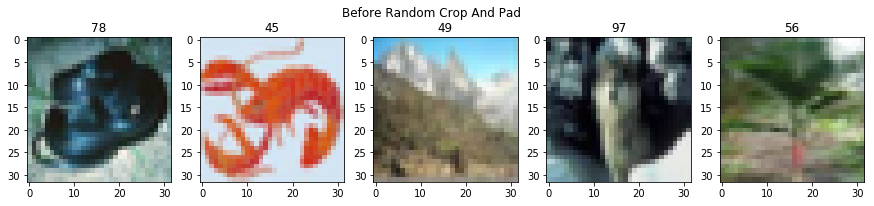

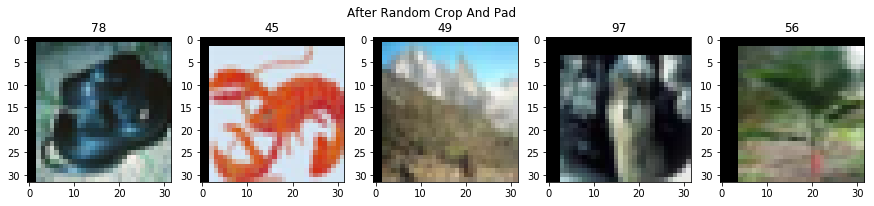

In [0]:
images, labels = train_set.next_batch(5)

fig = plt.figure(figsize=(15,3))
plt.suptitle("Before Random Crop And Pad")
axes = fig.subplots(1,5)
for image, label, ax in zip(images, labels, axes):
    ax.set_title(label)
    ax.imshow(image)
plt.show()

images = random_crop_and_pad(images,pad=4)

fig = plt.figure(figsize=(15,3))
plt.suptitle("After Random Crop And Pad")
axes = fig.subplots(1,5)
for image, label, ax in zip(images, labels, axes):
    ax.set_title(label) 
    ax.imshow(image)
plt.show()

<br>

## 2. 이미지를 뒤집기
----


In [0]:
def random_flip_left_right(images):
    """
    무작위로 이미지를 좌우로 뒤집어 주는 메소드    
    """
    # fix me # 
    return images

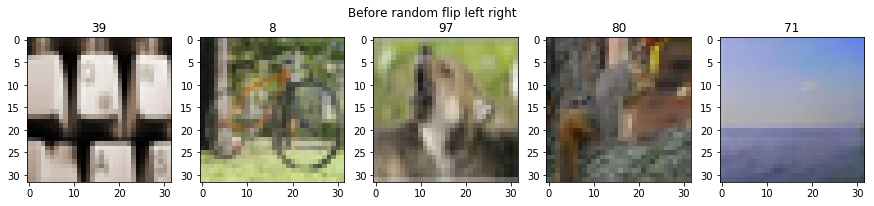

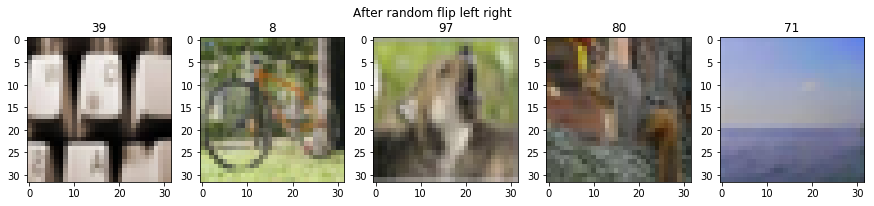

In [0]:
images, labels = train_set.next_batch(5)

fig = plt.figure(figsize=(15,3))
plt.suptitle("Before random flip left right")
axes = fig.subplots(1,5)
for image, label, ax in zip(images, labels, axes):
    ax.set_title(label)
    ax.imshow(image)
plt.show()

images = random_flip_left_right(images)

fig = plt.figure(figsize=(15,3))
plt.suptitle("After random flip left right")
axes = fig.subplots(1,5)
for image, label, ax in zip(images, labels, axes):
    ax.set_title(label)
    ax.imshow(image)
plt.show()

In [0]:
def random_flip_up_down(images):
    """
    무작위로 이미지를 위 아래로 뒤집어 주는 메소드    
    """
    # fix me #
    return images

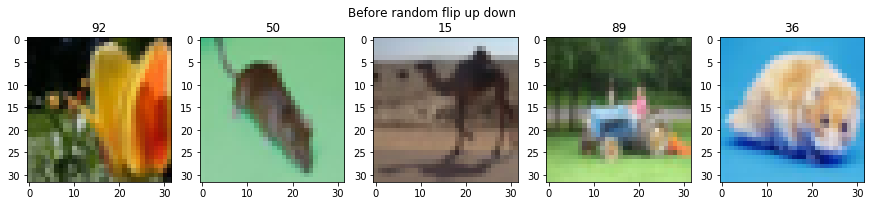

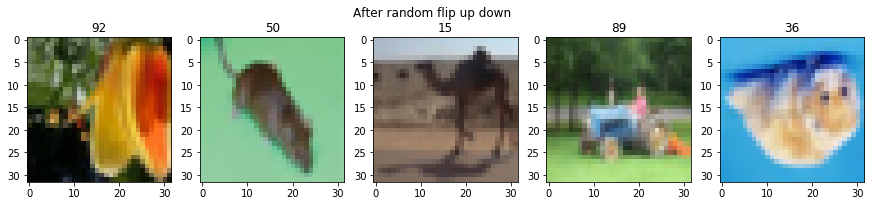

In [0]:
images, labels = train_set.next_batch(5)

fig = plt.figure(figsize=(15,3))
plt.suptitle("Before random flip up down")
axes = fig.subplots(1,5)
for image, label, ax in zip(images, labels, axes):
    ax.set_title(label)
    ax.imshow(image)
plt.show()

images = random_flip_up_down(images)

fig = plt.figure(figsize=(15,3))
plt.suptitle("After random flip up down")
axes = fig.subplots(1,5)
for image, label, ax in zip(images, labels, axes):
    ax.set_title(label)
    ax.imshow(image)
plt.show()

<br>

## 3. 이미지를 회전하기
----


- [cv2.getRotationMatrix2D ](https://docs.opencv.org/2.4/modules/imgproc/doc/geometric_transformations.html)을 사용합니다.

In [0]:
def random_rotate(images,max_angle=30):
    """
    최대 max_angle 내에서 이미지를 무작위로 회전시키는 메소드
    cv2.getRotationMatrix2D 을 사용합니다. 
    """
    #fix me # 
    return images

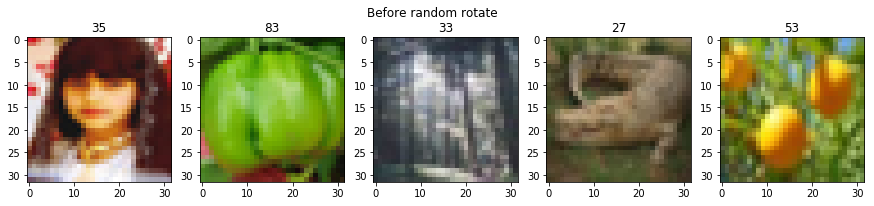

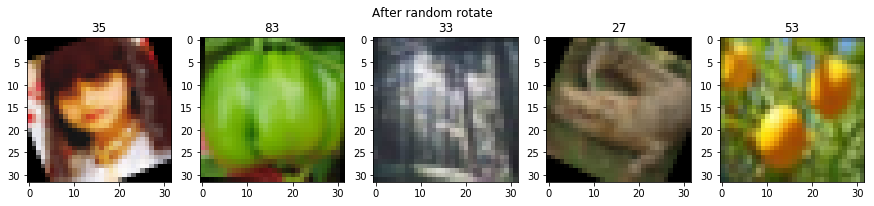

In [0]:
images, labels = train_set.next_batch(5)

fig = plt.figure(figsize=(15,3))
plt.suptitle("Before random rotate")
axes = fig.subplots(1,5)
for image, label, ax in zip(images, labels, axes):
    ax.set_title(label)
    ax.imshow(image)
plt.show()

images = random_rotate(images)

fig = plt.figure(figsize=(15,3))
plt.suptitle("After random rotate")
axes = fig.subplots(1,5)
for image, label, ax in zip(images, labels, axes):
    ax.set_title(label)
    ax.imshow(image)
plt.show()

<br>
<br>

# \[ 2. 픽셀의 색상 변화를 통한 Data Augmentation \]
---
---

> *색상은 사물을 판단하는 데 중요한 요소입니다. 그렇기 때문에 단순히 색상의 값에 변화를 주기 보다, 영상의 밝기, 채도 등을 변경하는 방식으로 데이터의 모수를 늘립니다.* <br>

<br>

## 1. HSV 색공간이란
---


> 영상의 색공간을 RGB에서 색상(Hue), 채도(Saturation) 명도(Value)를 표현할 수 있는 HSV 색공간으로 이전하여 영상의 값을 보정합니다.

* **Hue** :  
    
    가시광선 스펙트럼을 고리모양으로 배치한 색상환에서 가장 파장이 긴 빨강을 0°로 하였을 때 상대적인 배치 각도를 의미한다. 때문에 H 값은 0°~360°의 범위를 갖고 360°와 0°는 같은 색상 빨강을 가리킨다.
    
* **Saturation** : 
    
    채도값 S는 특정한 색상의 가장 진한 상태를 100%로 하였을 때 진함의 정도를 나타낸다. 채도값 0%는 같은 명도의 무채색을 나타낸다.

* **Value** : 
    
    명도값 V는 흰색, 빨간색 등을 100%, 검은색을 0%로 하였을 때 밝은 정도를 나타낸다.

> RGB 색공간에서 HSV의 색공간으로 바꾸기 위해서는 아래와 같은 변환수식을 거쳐야 합니다.

$$
V = max(R,G,B)
$$
$$
S = \begin{cases}
\frac{V-min(R,G,B)}{V} & \mbox{if }n \neq 0 \\
0 & \mbox{if }n = 0
\end{cases}
$$

$$
H = \begin{cases}
\frac{60(G-B)}{V-min(R,G,B)} & \mbox{if }V = R \\
120+\frac{60(B-R)}{V-min(R,G,B)} & \mbox{if }V = G \\
240+\frac{60(R-G)}{V-min(R,G,B)} & \mbox{if }V = B
\end{cases}
$$

> opencv에서는 위의 변환수식을 아래와 같이 간편히 적용할 수 있습니다.

````python
image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
````

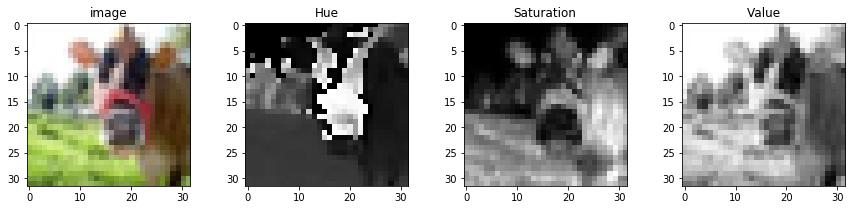

In [0]:
image, label = train_set[0]

# convert RGB to HWV
hsv = #fix me #
hue = hsv[#fix me#] # 색상
saturation = hsv[#fix me#] # 채도
value = hsv[#fix me #] # 명도


fig = plt.figure(figsize=(15,3))
axes = fig.subplots(1,4)
axes[0].set_title("image")
axes[0].imshow(image)

axes[1].set_title("Hue")
axes[1].imshow(hue,cmap='gray')

axes[2].set_title("Saturation")
axes[2].imshow(saturation,cmap='gray')

axes[3].set_title("Value")
axes[3].imshow(value,cmap='gray')
plt.show()

<br>

## 2. 색상값 변환
---


### (1) 색상 값을 낮추었을 때

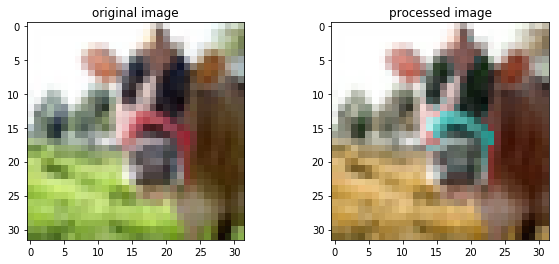

In [0]:
image, label = train_set[0]

fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(1,2,1)
ax.set_title('original image')
ax.imshow(image)


image = cv2.cvtColor(image, #fix me#)
image[:,:,0] = cv2.multiply(image[:,:,0],#fix me #)
image = #fix me #

ax = fig.add_subplot(1,2,2)
ax.set_title('processed image')
ax.imshow(image)
plt.show()

### (2) 색상 값을 높였을 때

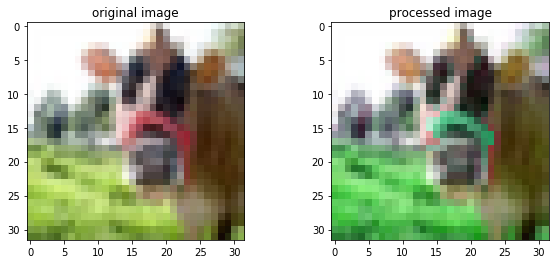

In [0]:
image, label = train_set[0]

fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(1,2,1)
ax.set_title('original image')
ax.imshow(image)


image = cv2.cvtColor(image, #fix me #)
image[:,:,0] = cv2.multiply(image[:,:,0],#fix me#)
image = cv2.cvtColor(image,#fix me#)

ax = fig.add_subplot(1,2,2)
ax.set_title('processed image')
ax.imshow(image)
plt.show()

### (3) Hue Augmentation 구현

In [0]:
def random_hue_correction(images,min_val=0.7,max_val=1.3):
    """
    무작위로 hue 값을 바꾸어주는 메소드
    """
    results = []
    for image in images:
        #fix me# 
    return np.stack(results)

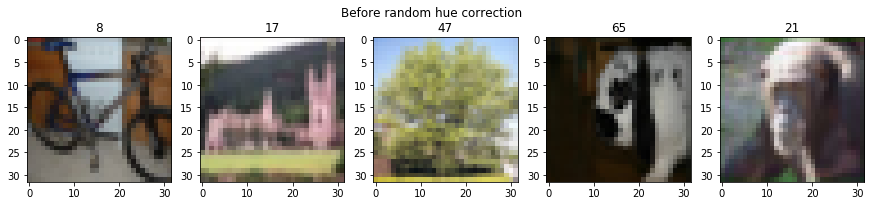

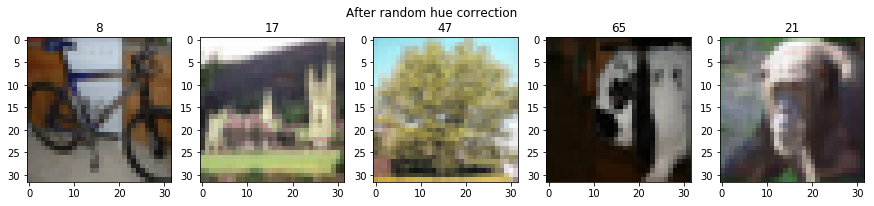

In [0]:
images, labels = train_set.next_batch(5)

fig = plt.figure(figsize=(15,3))
plt.suptitle("Before random hue correction")
axes = fig.subplots(1,5)
for image, label, ax in zip(images, labels, axes):
    ax.set_title(label)
    ax.imshow(image)
plt.show()

images = random_hue_correction(images)

fig = plt.figure(figsize=(15,3))
plt.suptitle("After random hue correction")
axes = fig.subplots(1,5)
for image, label, ax in zip(images, labels, axes):
    ax.set_title(label)
    ax.imshow(image)
plt.show()

<br>

## 3. 채도값 변환
---



### (1) 채도 값을 낮추었을 때

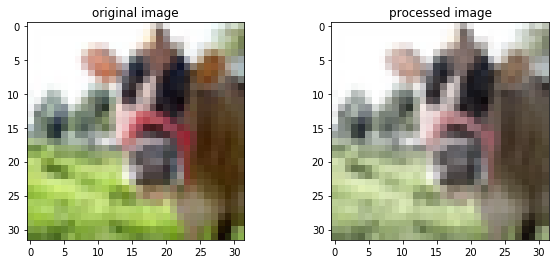

In [0]:
image, label = train_set[0]

fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(1,2,1)
ax.set_title('original image')
ax.imshow(image)


image = #fix me #
image[:,:,1] = cv2.multiply(image[:,:,1] ,0.5)
# convert HSV to RGB
image = #fix me#

ax = fig.add_subplot(1,2,2)
ax.set_title('processed image')
ax.imshow(image)
plt.show()

### (2) 채도 값을 높였을 때

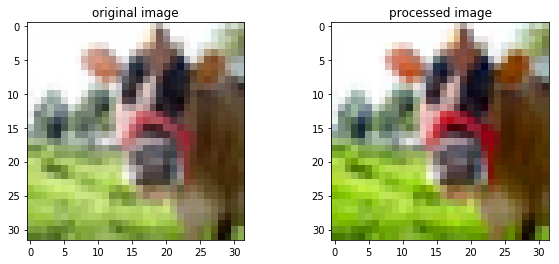

In [0]:
image, label = train_set[0]

fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(1,2,1)
ax.set_title('original image')
ax.imshow(image)


image = #fix me #
image[:,:,1] = cv2.multiply(image[:,:,1] ,0.5)
# convert HSV to RGB
image = #fix me#

ax = fig.add_subplot(1,2,2)
ax.set_title('processed image')
ax.imshow(image)
plt.show()

### (3) Saturation Augmentation 구현

In [0]:
def random_saturation_correction(images,min_val=0.5,max_val=1.5):
    """
    무작위로 Saturation 값을 바꾸어주는 메소드
    """
    results = []
    for image in images:
        #fix me # 
    return np.stack(results)

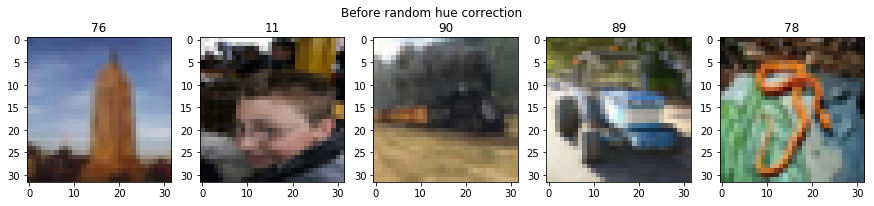

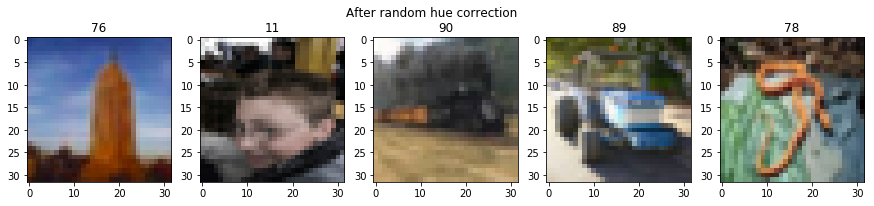

In [0]:
images, labels = train_set.next_batch(5)

fig = plt.figure(figsize=(15,3))
plt.suptitle("Before random Saturation correction")
axes = fig.subplots(1,5)
for image, label, ax in zip(images, labels, axes):
    ax.set_title(label)
    ax.imshow(image)
plt.show()

images = random_saturation_correction(images)

fig = plt.figure(figsize=(15,3))
plt.suptitle("After random Saturation correction")
axes = fig.subplots(1,5)
for image, label, ax in zip(images, labels, axes):
    ax.set_title(label)
    ax.imshow(image)
plt.show()

<br>

## 4. 명도값 변환
---



### (1) 명도 값을 낮추었을 때

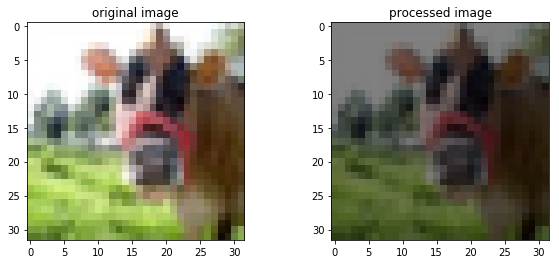

In [0]:
image, label = train_set[0]

fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(1,2,1)
ax.set_title('original image')
ax.imshow(image)


image = cv2.cvtColor(#fix me#)
image[:,:,2] = cv2.multiply(#fix me#)
image = cv2.cvtColor(#fix me#)

ax = fig.add_subplot(1,2,2)
ax.set_title('processed image')
ax.imshow(image)
plt.show()

### (2) 명도 값을 높였을 때

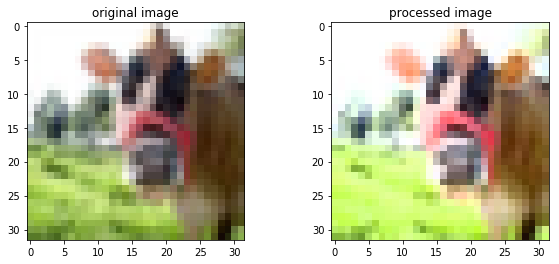

In [0]:
image, label = train_set[0]

fig = plt.figure(figsize=(10,4))

ax = fig.add_subplot(1,2,1)
ax.set_title('original image')
ax.imshow(image)


image = cv2.cvtColor(#fix me#)
image[:,:,2] = cv2.multiply(#fix me#)
image = cv2.cvtColor(#fix me#)

ax = fig.add_subplot(1,2,2)
ax.set_title('processed image')
ax.imshow(image)
plt.show()

### (3) Brightness Augmentation 구현

In [0]:
def random_brightness_correction(images,min_val=0.5,max_val=1.5):
    """
    무작위로 Brightness 값을 바꾸어주는 메소드
    """
    results = []
    for image in images:
        #fix me #
    return np.stack(results)

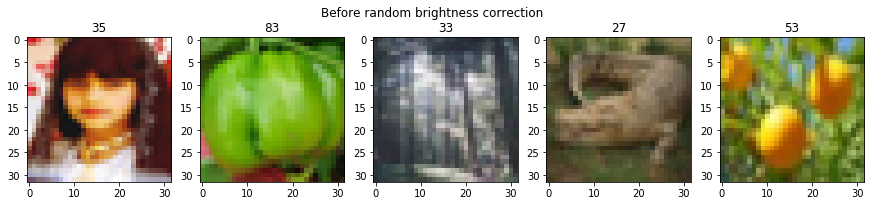

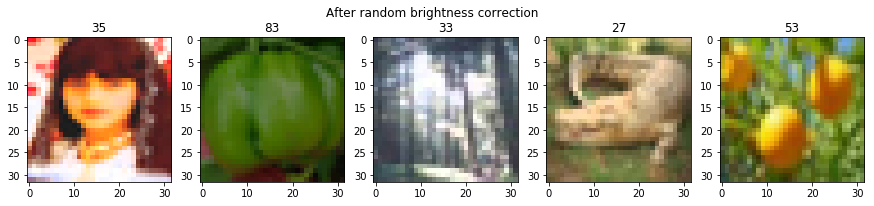

In [0]:
images, labels = train_set.next_batch(5)

fig = plt.figure(figsize=(15,3))
plt.suptitle("Before random brightness correction")
axes = fig.subplots(1,5)
for image, label, ax in zip(images, labels, axes):
    ax.set_title(label)
    ax.imshow(image)
plt.show()

images = random_brightness_correction(images)

fig = plt.figure(figsize=(15,3))
plt.suptitle("After random brightness correction")
axes = fig.subplots(1,5)
for image, label, ax in zip(images, labels, axes):
    ax.set_title(label)
    ax.imshow(image)
plt.show()

<br>
<br>

# \[ 3. Tensorflow 을 이용한 Augmentation\]
---
---

> *Tensorflow 의 image library 을 이용해  image을 augmentation 을 수행합니다.* <br>

In [0]:
from tensorflow.keras.datasets.cifar10 import load_data
(train_x, train_y), (test_x, test_y) = load_data()

In [0]:
def image_augmentation(image, is_training, crop_h, crop_w):

    def _aug_with_train(input_x, crop_height, crop_width):
        #fix me #

    def _aug_with_test(input_x, crop_height, crop_width):
        #fix me #
        return input_x

    image = #fix me# 
    return image



def images_augmentation(images, phase_train):
    crop_h, crop_w = #fix me #
    images = #fix me #
    return images

# Test Case

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


0.99999815 1.4066696e-06
1.0 0.0


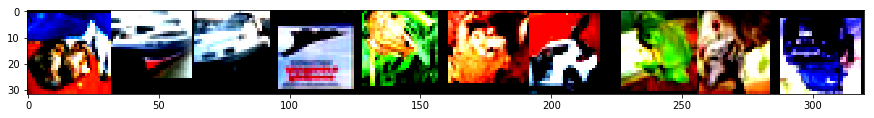

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


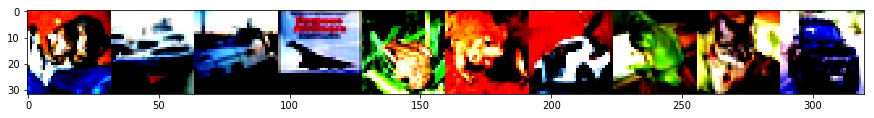

In [11]:
xs = tf.placeholder(shape=[None, 32, 32, 3], dtype=tf.float32, name='xs')
phase_train = tf.placeholder(shape=[], dtype=tf.bool, name='phase_train')
images = images_augmentation(xs, phase_train)


sess = tf.Session()
train_images = sess.run(images, {xs : test_x[:10], phase_train: True})
test_images = sess.run(images, {xs : test_x[:10], phase_train: False})


train_images = np.concatenate(train_images, axis=1)
test_images = np.concatenate(test_images, axis=1)

plt.figure(figsize=(15,10))
plt.imshow(train_images)
plt.show()

plt.figure(figsize=(15,10))
plt.imshow(test_images)
plt.show()

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.<br>
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/05/07

---